In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# imports
import numpy as np
from scipy.io import arff
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
features_to_keep = [
    'posteam',
    'defteam',
    'yardline_100',
    'quarter_seconds_remaining',
    'half_seconds_remaining',
    'game_seconds_remaining',
    'game_half',
    'quarter_end',
    'drive',
    'sp',
    'qtr',
    'down',
    'ydstogo',
    'ydsnet',
    'play_type',
    'posteam_timeouts_remaining',
    'defteam_timeouts_remaining',
    'posteam_score',
    'defteam_score',
    'score_differential',
    'ep',
    'epa',
    'previous_play1',
    'previous_play2',
    'previous_play3'
]

In [4]:

def set_previous_play1(row):
    if row['drive'] != row['previous_drive1']:
        return 'new_team'
    else:
        return row['previous_play1']


def set_previous_play2(row):
    if row['drive'] != row['previous_drive2']:
        return 'new_team'
    else:
        return row['previous_play2']


def set_previous_play3(row):
    if row['drive'] != row['previous_drive3']:
        return 'new_team'
    else:
        return row['previous_play3']


def load_nfl_data(file_path) -> [pd.DataFrame, pd.Series]:

    nfl_play_data: pd.DataFrame = pd.read_csv(file_path)

    # jank
    nfl_play_data[f'previous_play1'] = nfl_play_data['play_type'].shift(1)
    nfl_play_data[f'previous_drive1'] = nfl_play_data['drive'].shift(1)

    nfl_play_data[f'previous_play2'] = nfl_play_data['play_type'].shift(2)
    nfl_play_data[f'previous_drive2'] = nfl_play_data['drive'].shift(2)

    nfl_play_data[f'previous_play3'] = nfl_play_data['play_type'].shift(3)
    nfl_play_data[f'previous_drive3'] = nfl_play_data['drive'].shift(3)

    # add column for previous play(s)
    nfl_play_data['previous_play1'] = nfl_play_data.apply(set_previous_play1, axis=1)
    nfl_play_data['previous_play2'] = nfl_play_data.apply(set_previous_play2, axis=1)
    nfl_play_data['previous_play3'] = nfl_play_data.apply(set_previous_play3, axis=1)

    # keep only the columns listed
    nfl_play_data = nfl_play_data[features_to_keep]

    # remove any plays where play_type not in ('pass', 'run')
    nfl_play_data = nfl_play_data[nfl_play_data['play_type'].isin(['pass', 'run'])]

    nfl_play_data = nfl_play_data.dropna()

    # convert the number of seconds to hours
    nfl_play_data['quarter_seconds_remaining'] = nfl_play_data['quarter_seconds_remaining'] / 3600
    nfl_play_data['half_seconds_remaining'] = nfl_play_data['half_seconds_remaining'] / 3600
    nfl_play_data['game_seconds_remaining'] = nfl_play_data['game_seconds_remaining'] / 3600

    play_outcomes = pd.get_dummies(nfl_play_data.pop('play_type'))

    nfl_play_data = pd.get_dummies(nfl_play_data)

    return nfl_play_data, play_outcomes

In [5]:
X, y = load_nfl_data('/content/drive/MyDrive/CS 201R (270)/nfl/nfl-play-by-play-2009-2018.csv')

<ipython-input-4-f945db4c98df>:24: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_play_data: pd.DataFrame = pd.read_csv(file_path)


In [6]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)


# clf = MLPClassifier(
#     hidden_layer_sizes=[22], activation='relu', solver='sgd', alpha=0,
#     batch_size=1, learning_rate_init=0.001, shuffle=True, momentum=0, n_iter_no_change=50, max_iter=10000
# )
# clf.fit(X_train, y_train)


# y_train_results = clf.predict(X_train)
# y_test_results = clf.predict(X_test)



In [7]:
# print('n_iter: ', clf.n_iter_)
# print('Training Accuracy: ', accuracy_score(y_train_results, y_train))
# print('Test Accuracy: ', accuracy_score(y_test_results, y_test))
# print(' ')


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

list(X_train.columns)

['yardline_100',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'ydstogo',
 'ydsnet',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'ep',
 'epa',
 'posteam_ARI',
 'posteam_ATL',
 'posteam_BAL',
 'posteam_BUF',
 'posteam_CAR',
 'posteam_CHI',
 'posteam_CIN',
 'posteam_CLE',
 'posteam_DAL',
 'posteam_DEN',
 'posteam_DET',
 'posteam_GB',
 'posteam_HOU',
 'posteam_IND',
 'posteam_JAC',
 'posteam_JAX',
 'posteam_KC',
 'posteam_LA',
 'posteam_LAC',
 'posteam_MIA',
 'posteam_MIN',
 'posteam_NE',
 'posteam_NO',
 'posteam_NYG',
 'posteam_NYJ',
 'posteam_OAK',
 'posteam_PHI',
 'posteam_PIT',
 'posteam_SD',
 'posteam_SEA',
 'posteam_SF',
 'posteam_STL',
 'posteam_TB',
 'posteam_TEN',
 'posteam_WAS',
 'defteam_ARI',
 'defteam_ATL',
 'defteam_BAL',
 'defteam_BUF',
 'defteam_CAR',
 'defteam_CHI',
 'defteam_CIN',
 'defteam_CLE',
 'defteam_

In [9]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        return out

# Define training parameters
input_size = X_train.shape[1]
num_classes = 2  # Assuming binary classification (run or pass)
learning_rate = 0.00005
num_epochs = 5000
hidden_size = 256

# Initialize the model
model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
accuracies = []
losses = []

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, torch.argmax(y_train_tensor, dim=1))
    losses.append(loss)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        # Test the model
        with torch.no_grad():
            outputs = model(X_test_tensor)
            _, predicted = torch.max(outputs.data, 1)
            accuracy = (predicted == torch.argmax(y_test_tensor, dim=1)).sum().item() / y_test_tensor.size(0)
            print(f'Test Accuracy: {accuracy:.4f}')
            accuracies.append(accuracy)


Epoch [100/5000], Loss: 0.6691
Test Accuracy: 0.5972
Epoch [200/5000], Loss: 0.6481
Test Accuracy: 0.6161
Epoch [300/5000], Loss: 0.6343
Test Accuracy: 0.6315
Epoch [400/5000], Loss: 0.6244
Test Accuracy: 0.6434
Epoch [500/5000], Loss: 0.6149
Test Accuracy: 0.6543
Epoch [600/5000], Loss: 0.6084
Test Accuracy: 0.6568
Epoch [700/5000], Loss: 0.6020
Test Accuracy: 0.6652
Epoch [800/5000], Loss: 0.5965
Test Accuracy: 0.6724
Epoch [900/5000], Loss: 0.5914
Test Accuracy: 0.6762
Epoch [1000/5000], Loss: 0.5873
Test Accuracy: 0.6804
Epoch [1100/5000], Loss: 0.5837
Test Accuracy: 0.6818
Epoch [1200/5000], Loss: 0.5798
Test Accuracy: 0.6881
Epoch [1300/5000], Loss: 0.5769
Test Accuracy: 0.6915
Epoch [1400/5000], Loss: 0.5733
Test Accuracy: 0.6940
Epoch [1500/5000], Loss: 0.5710
Test Accuracy: 0.6972
Epoch [1600/5000], Loss: 0.5682
Test Accuracy: 0.6995
Epoch [1700/5000], Loss: 0.5653
Test Accuracy: 0.7025
Epoch [1800/5000], Loss: 0.5619
Test Accuracy: 0.7029
Epoch [1900/5000], Loss: 0.5598
Test 

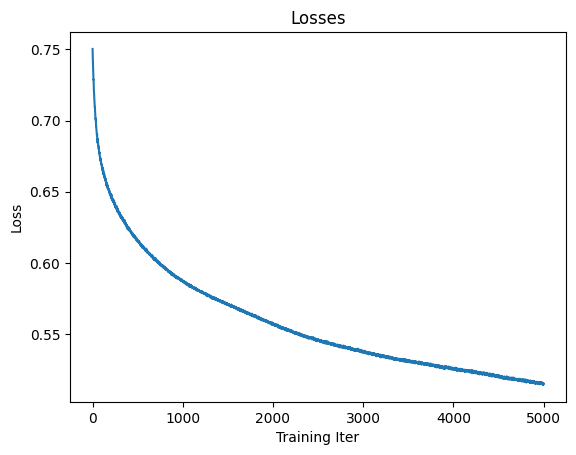

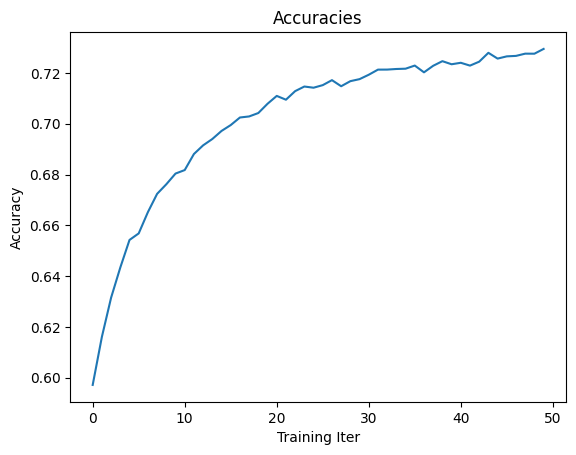

In [12]:
def plot_graph(data, title, xlabel, ylabel):
    plt.plot(data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

losses = [loss.item() for loss in losses]
plot_graph(losses, "Losses", "Training Iter", "Loss")

plot_graph(accuracies, "Accuracies", "Training Iter", "Accuracy")